In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

import tweepy
from tweepy import OAuthHandler
from datetime import datetime, timedelta
from wordcloud import WordCloud, STOPWORDS
from IPython.display import clear_output

In [2]:
pd.set_option('display.max_colwidth', None)

# load it into a pandas dataframe
#tweet_df = pd.DataFrame(tweet_lst, columns=['tweet_dt', 'topic', 'id', 'username', 'name', 'tweet', 'like_count', 'reply_count', 'retweet_count', 'retweeted'])
#tweet_df.to_csv(root_path+ '/tweets (1).csv', index = False, header=True)
tweet_df =pd.read_csv('/content/tweetsCOVID19253.csv')
tweet_df['clean_tweets'] = "empty"
tweet_df.head(10)

,tweet_dt,topic,id,username,name,tweet,tag_type,tag,sentiment,polarity,adj_polarity,like_count,reply_count,retweet_count,clean_tweets
0,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,empty
1,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,empty
2,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,empty
3,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,empty
4,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,empty
5,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",LOC,UK,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,empty
6,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",Hashtag,#COVID19,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,empty
7,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,empty
8,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",LOC,UK,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,empty
9,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",Hashtag,#COVID19,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,empty


In [3]:
# Clean the data
import re
def clean_tweets(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [4]:
from textblob import TextBlob
def analyze_tweets(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [5]:
def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic)
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new

In [6]:
# Call function to get Clean tweets
tweet_df['clean_tweets'] = tweet_df['tweet'].apply(lambda x : clean_tweets(x))
tweet_df.head(15)

,tweet_dt,topic,id,username,name,tweet,tag_type,tag,sentiment,polarity,adj_polarity,like_count,reply_count,retweet_count,clean_tweets
0,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for
1,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for
2,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for
3,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for
4,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic
5,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",LOC,UK,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic
6,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",Hashtag,#COVID19,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic
7,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic
8,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",LOC,UK,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic
9,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",Hashtag,#COVID19,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic


In [7]:
# call function to get the sentiments
tweet_df["Sentiment"] = tweet_df["clean_tweets"].apply(lambda x : analyze_tweets(x))
tweet_df.head(10)

,tweet_dt,topic,id,username,name,tweet,tag_type,tag,sentiment,polarity,adj_polarity,like_count,reply_count,retweet_count,clean_tweets,Sentiment
0,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive
1,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive
2,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive
3,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive
4,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
5,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",LOC,UK,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
6,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",Hashtag,#COVID19,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
7,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
8,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",LOC,UK,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive
9,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",Hashtag,#COVID19,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive


In [8]:
# check summary of random record
n = 5
print("Original tweet:\n",tweet_df['tweet'][n])
print()
print("Clean tweet:\n",tweet_df['clean_tweets'][n])
print()
print("Sentiment of the tweet:\n",tweet_df['Sentiment'][n])

Original tweet:
 Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM

Clean tweet:
 next in line to the throne prince charles has tested positive for covid19 uk media file pic

Sentiment of the tweet:
 Positive


In [9]:
# overall summary
print("Total Tweets Extracted for Topic : {} are : {}".format(tweet_df,len(tweet_df.tweet)))
print("Total Positive Tweets are : {}".format(len(tweet_df[tweet_df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(tweet_df[tweet_df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(tweet_df[tweet_df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic :          tweet_dt    topic                   id        username  \
0      2020-03-25  Covid19  1242787309004689408      HousingLIN   
1      2020-03-25  Covid19  1242787309004689408      HousingLIN   
2      2020-03-25  Covid19  1242787309004689408      HousingLIN   
3      2020-03-25  Covid19  1242787309004689408      HousingLIN   
4      2020-03-25  Covid19  1242787307327012864          Rajki_   
...           ...      ...                  ...             ...   
90497  2020-03-25  Covid19  1242774385892700162  what1wants2say   
90498  2020-03-25  Covid19  1242774383929831427  LucyIngram_IGD   
90499  2020-03-25  Covid19  1242774383929831427  LucyIngram_IGD   
90500  2020-03-25  Covid19  1242774383929831427  LucyIngram_IGD   
90501  2020-03-25  Covid19  1242774383929831427  LucyIngram_IGD   

                 name  \
0      Jeremy Porteus   
1      Jeremy Porteus   
2      Jeremy Porteus   
3      Jeremy Porteus   
4               Rajki   
...       

In [10]:
tweet_df["Sentiment"].value_counts()

,count
Sentiment,
Neutral,43962
Positive,33643
Negative,12897


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

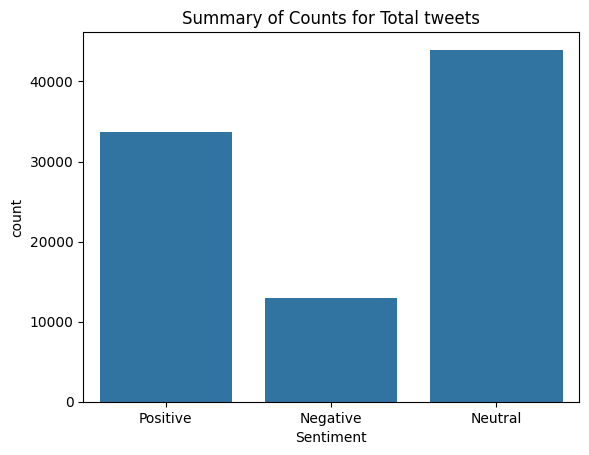

In [11]:
sns.countplot(x="Sentiment", data=tweet_df)
plt.title("Summary of Counts for Total tweets")

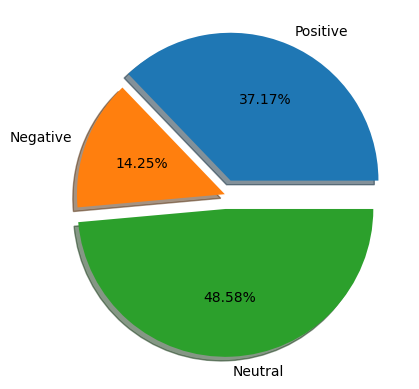

In [12]:
a=len(tweet_df[tweet_df["Sentiment"]=="Positive"])
b=len(tweet_df[tweet_df["Sentiment"]=="Negative"])
c=len(tweet_df[tweet_df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

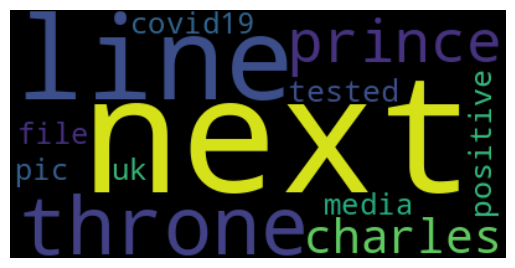

In [14]:
# Start with one review:

text = tweet_df.clean_tweets[5]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=50).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
class Topic:
    def __init__(self, left: 'Tree', right: 'Tree'):
        self.left = left
        self.right = right

There are 8834803 words in the combination of all review.


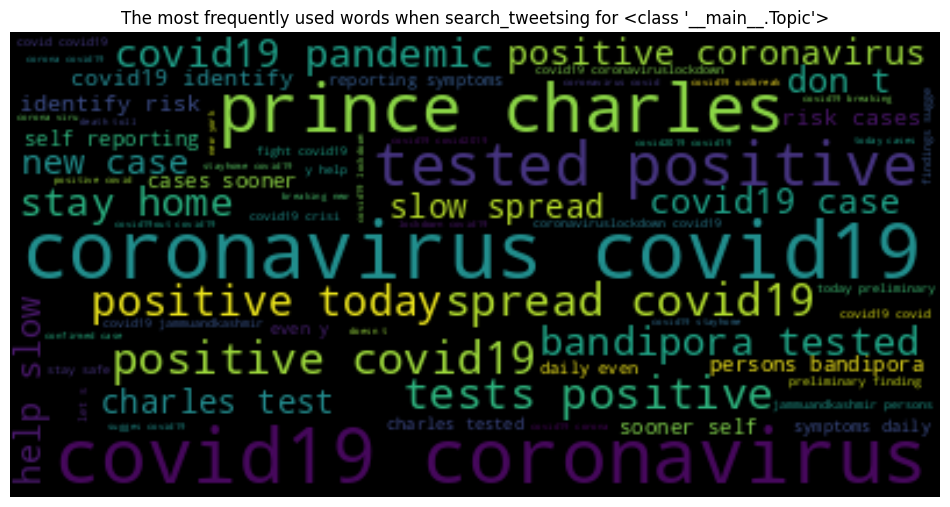

In [16]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these tweets.

text = " ".join(review for review in tweet_df.clean_tweets)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when search_tweetsing for {}".format(Topic),)
plt.axis("off")
plt.show()

There are 8834803 words in the combination of all review.


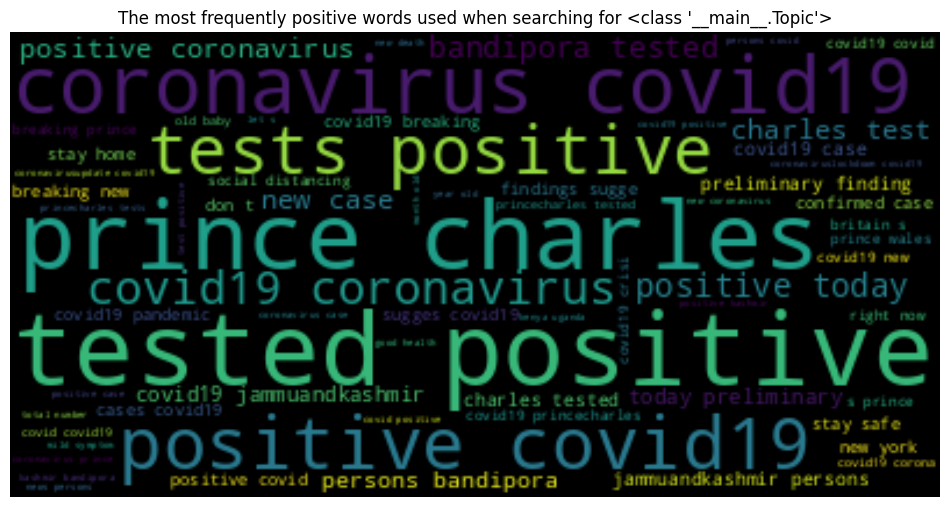

In [17]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most common in these tweets.

text_positive = " ".join(review for review in tweet_df[tweet_df["Sentiment"]=="Positive"].clean_tweets)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
text_new_positive = prepCloud(text_positive,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently positive words used when searching for {}".format(Topic))
plt.axis("off")
plt.show()

There are 8834803 words in the combination of all review.


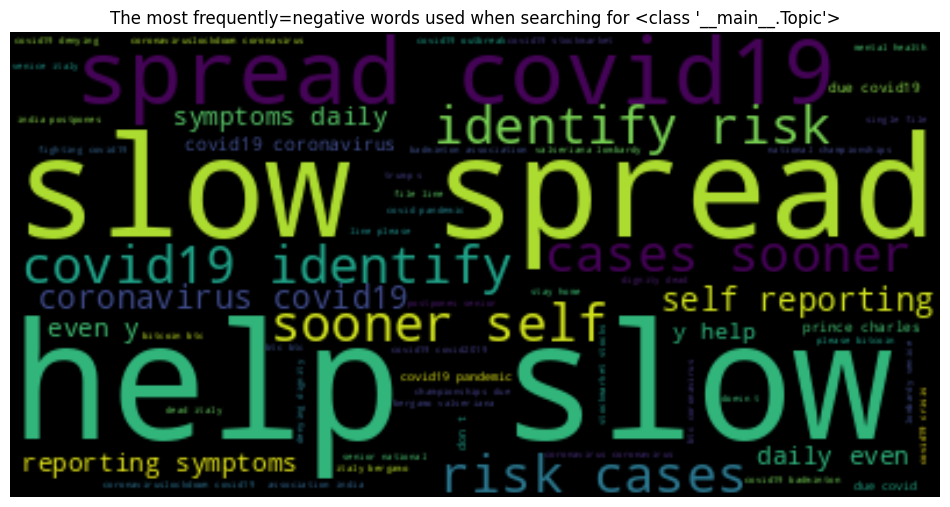

In [18]:
# Combine Negative reviews into one big text and create a Cloud to see which Words are most common in these df.

text_negative = " ".join(review for review in tweet_df[tweet_df["Sentiment"]=="Negative"].clean_tweets)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently=negative words used when searching for {}".format(Topic))
plt.axis("off")
plt.show()

In [19]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

 #Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

 #Create two new columns ‘Subjectivity’ & ‘Polarity’
tweet_df['TextBlob_Subjectivity'] =    tweet_df['tweet'].apply(getSubjectivity)
tweet_df['TextBlob_Polarity'] = tweet_df['tweet'].apply(getPolarity)
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
# tweet_df['TextBlob_Analysis'] = tweet_df['TextBlob_Polarity'].apply(getAnalysis )

In [20]:
tweet_df.head()

,tweet_dt,topic,id,username,name,tweet,tag_type,tag,sentiment,polarity,adj_polarity,like_count,reply_count,retweet_count,clean_tweets,Sentiment,TextBlob_Subjectivity,TextBlob_Polarity
0,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
1,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
2,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
3,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,NEGATIVE,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
4,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,NEGATIVE,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive,0.272727,0.113636


In [21]:
tweet_df.loc[tweet_df['sentiment']=='NEGATIVE','sentiment'] = 'Negative'
tweet_df.loc[tweet_df['sentiment']=='POSITIVE','sentiment'] = 'Positive'
tweet_df.loc[tweet_df['sentiment']=='NEUTRAL','sentiment'] = 'Neutral'
tweet_df[tweet_df['sentiment']!=tweet_df['Sentiment']]

,tweet_dt,topic,id,username,name,tweet,tag_type,tag,sentiment,polarity,adj_polarity,like_count,reply_count,retweet_count,clean_tweets,Sentiment,TextBlob_Subjectivity,TextBlob_Polarity
0,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,Negative,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
1,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,Negative,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
2,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,Negative,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
3,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,Negative,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
4,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,Negative,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive,0.272727,0.113636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90497,2020-03-25,Covid19,1242774385892700162,what1wants2say,ISayIt,"I see @comcast @Xfinity is taking advantage of #COVID19 and upping my bill by $15 per month. Thanks for nothing, jerks.",Hashtag,#COVID19,Negative,0.998789,-0.998789,0.0,0.0,0.0,i see is taking advantage of covid19 and upping my bill by 15 per month thanks for nothing jerks,Positive,0.200000,0.200000
90498,2020-03-25,Covid19,1242774383929831427,LucyIngram_IGD,Lucy,We look at what Iceland Foods is doing to meet the evolving challenges of the Coronavirus (COVID-19) pandemic.… https://t.co/b9hHPuxfRf,ORG,Iceland Foods,Negative,0.999997,-0.999997,4.0,0.0,4.0,we look at what iceland foods is doing to meet the evolving challenges of the coronavirus covid 19 pandemic,Neutral,0.000000,0.000000
90499,2020-03-25,Covid19,1242774383929831427,LucyIngram_IGD,Lucy,We look at what Iceland Foods is doing to meet the evolving challenges of the Coronavirus (COVID-19) pandemic.… https://t.co/b9hHPuxfRf,MISC,Coronavirus,Negative,0.999997,-0.999997,4.0,0.0,4.0,we look at what iceland foods is doing to meet the evolving challenges of the coronavirus covid 19 pandemic,Neutral,0.000000,0.000000
90500,2020-03-25,Covid19,1242774383929831427,LucyIngram_IGD,Lucy,We look at what Iceland Foods is doing to meet the evolving challenges of the Coronavirus (COVID-19) pandemic.… https://t.co/b9hHPuxfRf,ORG,Iceland Foods,Negative,0.999997,-0.999997,4.0,0.0,4.0,we look at what iceland foods is doing to meet the evolving challenges of the coronavirus covid 19 pandemic,Neutral,0.000000,0.000000


In [22]:
tweet_df.head()

,tweet_dt,topic,id,username,name,tweet,tag_type,tag,sentiment,polarity,adj_polarity,like_count,reply_count,retweet_count,clean_tweets,Sentiment,TextBlob_Subjectivity,TextBlob_Polarity
0,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,Negative,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
1,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,Negative,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
2,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,Negative,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
3,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,Negative,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
4,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,Negative,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive,0.272727,0.113636


In [23]:
tweet_df

,tweet_dt,topic,id,username,name,tweet,tag_type,tag,sentiment,polarity,adj_polarity,like_count,reply_count,retweet_count,clean_tweets,Sentiment,TextBlob_Subjectivity,TextBlob_Polarity
0,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,Negative,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
1,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,Negative,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
2,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#Vision2020,Negative,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
3,2020-03-25,Covid19,1242787309004689408,HousingLIN,Jeremy Porteus,Registered to attend our pre-conf reception tonight &amp; #Vision2020 #HLINconf20 tomorrow &amp; not heard off? Thanks for… https://t.co/IZWqzDFDH8,Hashtag,#HLINconf20,Negative,0.997264,-0.997264,0.0,0.0,0.0,registered to attend our pre conf reception tonight amp vision2020 hlinconf20 tomorrow amp not heard off thanks for,Positive,0.200000,0.200000
4,2020-03-25,Covid19,1242787307327012864,Rajki_,Rajki,"Next in line to the throne, Prince Charles has tested positive for #COVID19: UK media (file pic) https://t.co/x1O0Gq4YDM",PER,Prince Charles,Negative,0.999997,-0.999997,0.0,0.0,0.0,next in line to the throne prince charles has tested positive for covid19 uk media file pic,Positive,0.272727,0.113636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90497,2020-03-25,Covid19,1242774385892700162,what1wants2say,ISayIt,"I see @comcast @Xfinity is taking advantage of #COVID19 and upping my bill by $15 per month. Thanks for nothing, jerks.",Hashtag,#COVID19,Negative,0.998789,-0.998789,0.0,0.0,0.0,i see is taking advantage of covid19 and upping my bill by 15 per month thanks for nothing jerks,Positive,0.200000,0.200000
90498,2020-03-25,Covid19,1242774383929831427,LucyIngram_IGD,Lucy,We look at what Iceland Foods is doing to meet the evolving challenges of the Coronavirus (COVID-19) pandemic.… https://t.co/b9hHPuxfRf,ORG,Iceland Foods,Negative,0.999997,-0.999997,4.0,0.0,4.0,we look at what iceland foods is doing to meet the evolving challenges of the coronavirus covid 19 pandemic,Neutral,0.000000,0.000000
90499,2020-03-25,Covid19,1242774383929831427,LucyIngram_IGD,Lucy,We look at what Iceland Foods is doing to meet the evolving challenges of the Coronavirus (COVID-19) pandemic.… https://t.co/b9hHPuxfRf,MISC,Coronavirus,Negative,0.999997,-0.999997,4.0,0.0,4.0,we look at what iceland foods is doing to meet the evolving challenges of the coronavirus covid 19 pandemic,Neutral,0.000000,0.000000
90500,2020-03-25,Covid19,1242774383929831427,LucyIngram_IGD,Lucy,We look at what Iceland Foods is doing to meet the evolving challenges of the Coronavirus (COVID-19) pandemic.… https://t.co/b9hHPuxfRf,ORG,Iceland Foods,Negative,0.999997,-0.999997,4.0,0.0,4.0,we look at what iceland foods is doing to meet the evolving challenges of the coronavirus covid 19 pandemic,Neutral,0.000000,0.000000


In [24]:
new_df = pd.DataFrame({'Original_Positive':tweet_df['sentiment'] == 'Positive', 'Predicted_Positive': tweet_df['Sentiment']=='Positive',
                       'Original_Negative':tweet_df['sentiment'] == 'Negative', 'Predicted_Negative': tweet_df['Sentiment']=='Negative',
                       'Original_Neutral':tweet_df['sentiment'] == 'Neutral', 'Predicted_Neutral': tweet_df['Sentiment']=='Neutral'})
new_df

,Original_Positive,Predicted_Positive,Original_Negative,Predicted_Negative,Original_Neutral,Predicted_Neutral
0,False,True,True,False,False,False
1,False,True,True,False,False,False
2,False,True,True,False,False,False
3,False,True,True,False,False,False
4,False,True,True,False,False,False
...,...,...,...,...,...,...
90497,False,True,True,False,False,False
90498,False,False,True,False,False,True
90499,False,False,True,False,False,True
90500,False,False,True,False,False,True


In [25]:
y_true = []
y_pred = []

for _, row in new_df.iterrows():
  if row['Original_Positive']:
    y_true.append('Positive')
  elif row['Original_Negative']:
    y_true.append('Negative')
  elif row['Original_Neutral']:
    y_true.append('Neutral')

  if row['Predicted_Positive']:
    y_pred.append('Positive')
  elif row['Predicted_Negative']:
    y_pred.append('Negative')
  elif row['Predicted_Neutral']:
    y_pred.append('Neutral')

Length of y_true: 90501
Length of y_pred: 90502


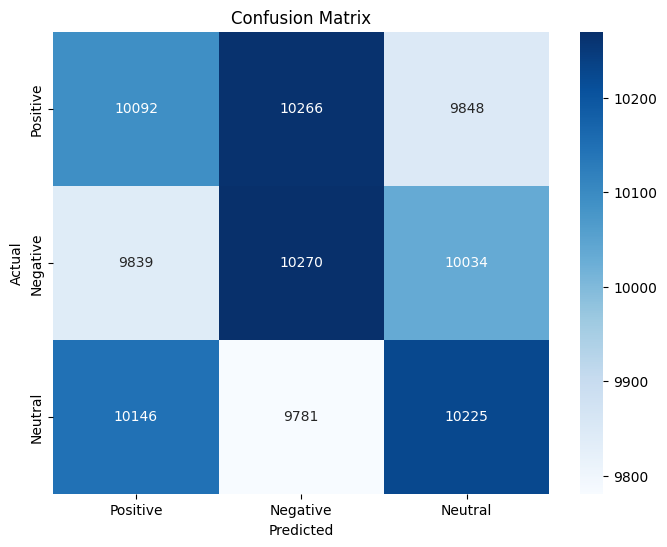

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Sample data (replace this with your actual data)
# Here I'm generating random true and predicted values for demonstration.
# In your case, replace these with your actual y_true and y_pred arrays.
np.random.seed(0)  # For reproducibility
y_true = np.random.choice(['Positive', 'Negative', 'Neutral'], size=90501)  # Actual labels
y_pred = np.random.choice(['Positive', 'Negative', 'Neutral'], size=90502)  # Predicted labels

# Check lengths
print("Length of y_true:", len(y_true))
print("Length of y_pred:", len(y_pred))

# Ensure both arrays have the same length
min_length = min(len(y_true), len(y_pred))
y_true = y_true[:min_length]
y_pred = y_pred[:min_length]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['Positive', 'Negative', 'Neutral'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Negative', 'Neutral'],
            yticklabels=['Positive', 'Negative', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, mean_absolute_error

# Assuming y_true and y_pred are defined as in your code

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Recall
recall = recall_score(y_true, y_pred, average='macro')  # Use 'macro' for multiclass
print("Recall:", recall)

# Precision
precision = precision_score(y_true, y_pred, average='macro')
print("Precision:", precision)

# F1-score
f1 = f1_score(y_true, y_pred, average='macro')
print("F1-score:", f1)

Accuracy: 0.3379741660313146
Recall: 0.3379767474794906
Precision: 0.33797154436147037
F1-score: 0.33797263381795406
